# Estimación por mínimos cuadrados
_Nicolás Villegas Vargas, María Camila Vásquez Correa_

Modelación Experimental, 2019-1

### ARMA: Datos artificiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import warnings
np.random.seed(123459)
warnings.simplefilter('ignore')
%matplotlib inline

py.init_notebook_mode(connected=True)

Generamos datos con los siguientes parámetros

In [2]:
A = np.matrix([[.75,-0.25],[1, 0]])
D = np.matrix([[.4,.35],[0,0]])

In [3]:
# Simulacion de datos
p = 2
q = 2
nobs = 1000
X = np.zeros((nobs,p))
# condicion inicial
X[0] = np.array([-0.1,-5])
# Ruido
e = np.random.normal(size=nobs)

In [4]:
for i in range(1, nobs):
    X[i] = X[i-1]*A.transpose() + np.array([e[i-1],e[i]])*D.transpose()

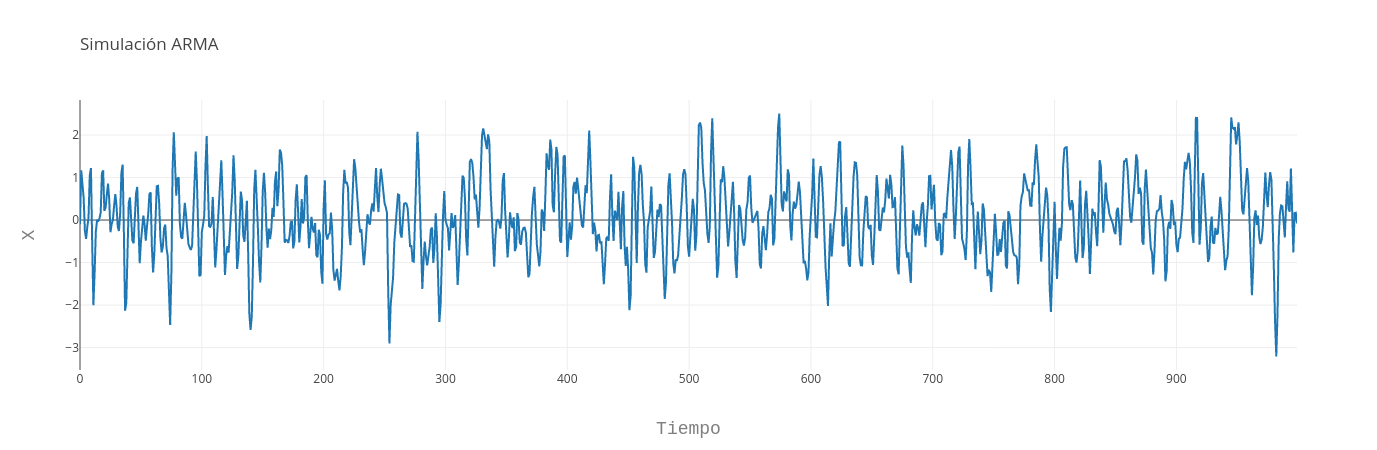

In [5]:
trace1 = go.Scatter(
    y = X.T[0],
    x = np.arange(nobs),
    name = 'ARMA'
)

data = [trace1]
layout = go.Layout(
    title=go.layout.Title(
        text='Simulación ARMA',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='X',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='ARMA')

In [6]:
X = np.matrix(X)

### Ordinary Least Squares

### Estimación de parámetros

In [7]:
def ols(X, t):
    V = X[0].transpose()*X[1]
    G = X[0].transpose()*X[0]
    for i in range(1,t):
        V += X[i].transpose()*X[i+1]
        G += X[i].transpose()*X[i]
    return V.transpose()*np.linalg.inv(G)    

In [8]:
c1 = []
c2 = []
for t in range(5, nobs-1):
    c = ols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

In [9]:
a1 = [A.A1[0] for _ in range(len(c1))]
a2 = [A.A1[1] for _ in range(len(c2))]

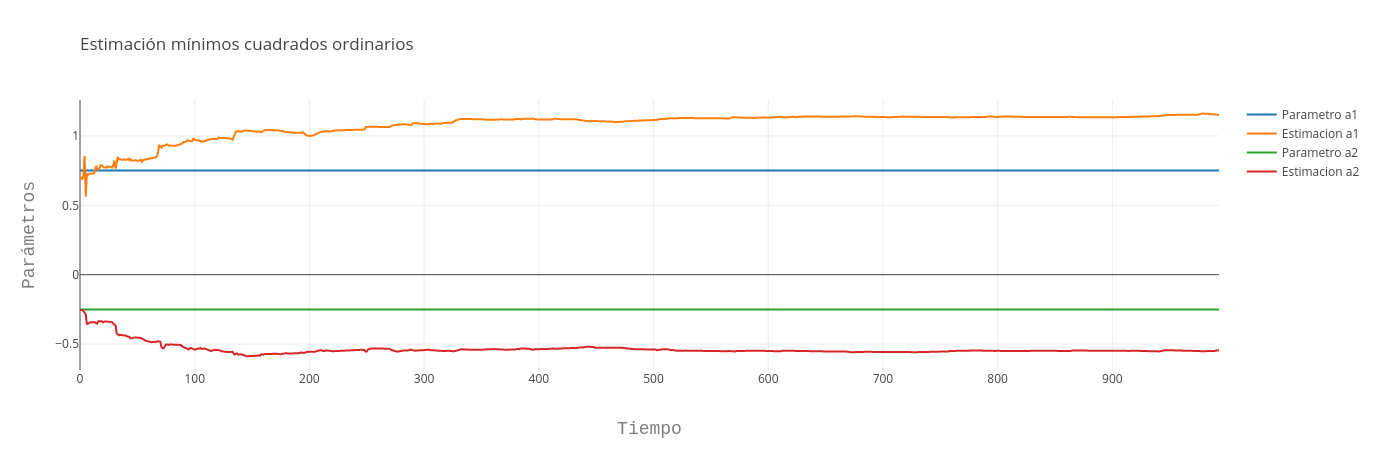

In [10]:
trace = go.Scatter(
    y = a1,
    x = np.arange(nobs),
    name = 'Parametro a1')

trace1 = go.Scatter(
    y = c1,
    x = np.arange(nobs),
    name = 'Estimacion a1')

trace2 = go.Scatter(
    y = a2,
    x = np.arange(nobs),
    name = 'Parametro a2')

trace3 = go.Scatter(
    y = c2,
    x = np.arange(nobs),
    name = 'Estimacion a2')

layout = go.Layout(
    title=go.layout.Title(
        text='Estimación mínimos cuadrados ordinarios',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Parámetros',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

traces = [trace, trace1, trace2, trace3]

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='OLSARMA')


## Instrumental Variables

In [11]:
def IVols(X,t):
    V = X[0].transpose()*X[2]
    G = X[2].transpose()*X[1]
    for i in range(1,t):
        V += X[i].transpose()*X[i+2]
        G += X[i+2].transpose()*X[i+1]
    return V.transpose()*np.linalg.inv(G)    

In [12]:
X = np.matrix(X)
c1 = []
c2 = []
for t in range(50, nobs-1):
    c = IVols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

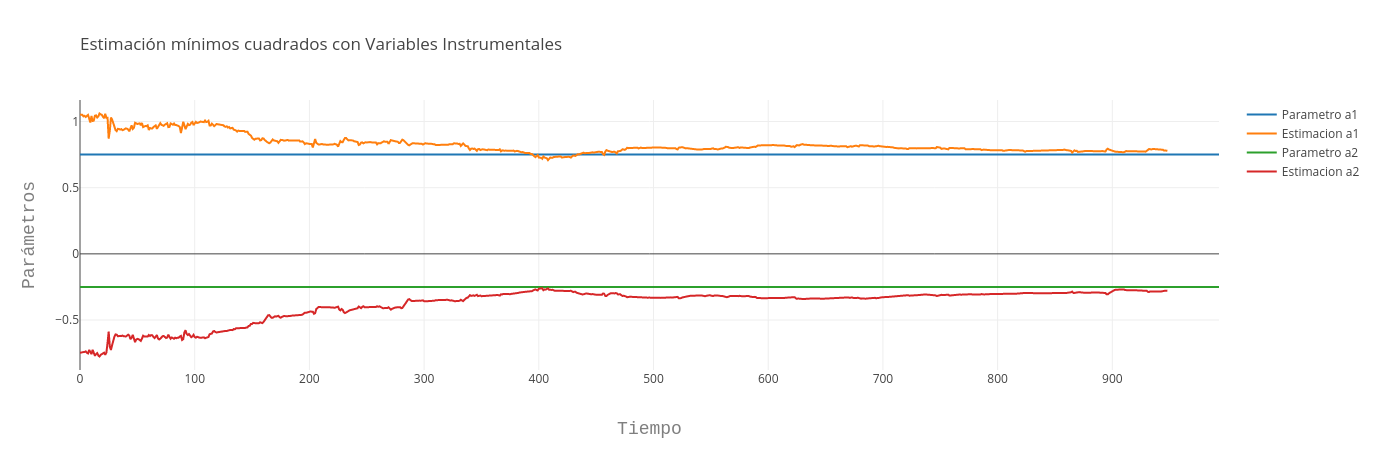

In [13]:
trace = go.Scatter(
    y = a1,
    x = np.arange(nobs),
    name = 'Parametro a1')

trace1 = go.Scatter(
    y = c1,
    x = np.arange(nobs),
    name = 'Estimacion a1')

trace2 = go.Scatter(
    y = a2,
    x = np.arange(nobs),
    name = 'Parametro a2')

trace3 = go.Scatter(
    y = c2,
    x = np.arange(nobs),
    name = 'Estimacion a2')

layout = go.Layout(
    title=go.layout.Title(
        text='Estimación mínimos cuadrados con Variables Instrumentales',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Parámetros',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

traces = [trace, trace1, trace2, trace3]

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='3')


### Recursive Least Squares

In [14]:
def RLS(X, ti, tf):
    V = X[ti].T*X[ti+1]
    G = X[ti].T*X[ti]
    R = np.linalg.inv(G)
    C = V.T*R
    for i in range(ti+1, tf):
        R -= (R*X[i].T*X[i]*R)/(1+X[i]*R*X[i].T)
        C += (X[i+1].T - C*X[i].T)*X[i]*R
    return C

In [15]:
c1 = []
c2 = []
for t in range(50, nobs):
    c = RLS(X, 3, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

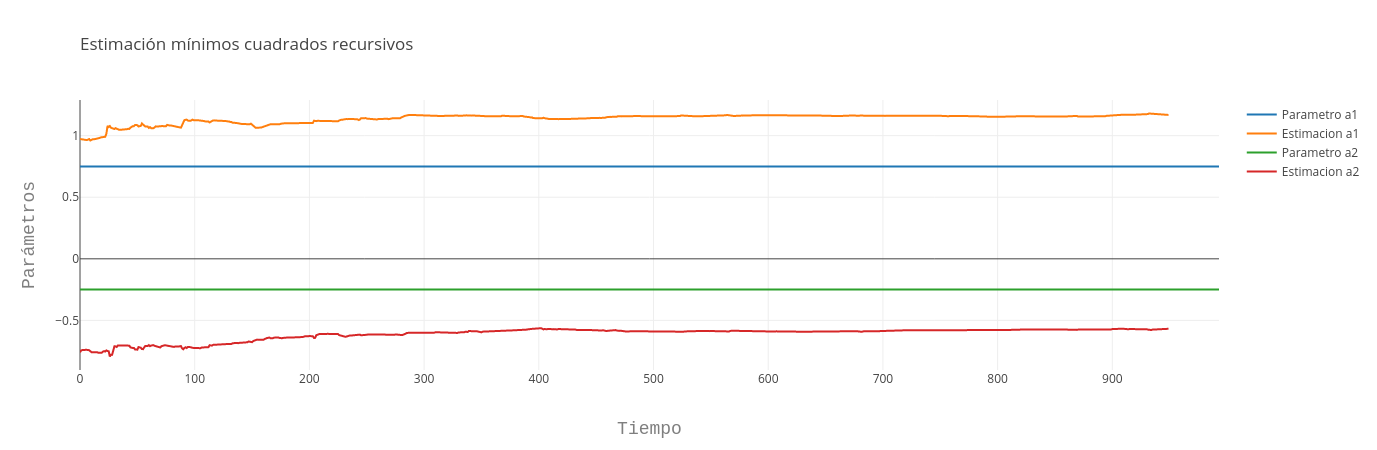

In [16]:
trace = go.Scatter(
    y = a1,
    x = np.arange(nobs),
    name = 'Parametro a1')

trace1 = go.Scatter(
    y = c1,
    x = np.arange(nobs),
    name = 'Estimacion a1')

trace2 = go.Scatter(
    y = a2,
    x = np.arange(nobs),
    name = 'Parametro a2')

trace3 = go.Scatter(
    y = c2,
    x = np.arange(nobs),
    name = 'Estimacion a2')

layout = go.Layout(
    title=go.layout.Title(
        text='Estimación mínimos cuadrados recursivos',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Parámetros',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

traces = [trace, trace1, trace2, trace3]

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig,filename='RLS')


## ARMAX 

In [17]:
a = 2
b = 3
def u(t):
    return a + b*np.sin(2*np.pi*t)
u1 = [u(t) for t in np.linspace(0,1,nobs)]
B = np.matrix([[1,0]])

In [18]:
X = np.zeros((p,nobs)).T
for i in range(1, nobs):
    X[i] = X[i-1]*A.T + B*u1[i].T +  np.array([e[i-1],e[i]])*D.transpose()

In [19]:
C = np.c_[A,B.T]
Bt = np.c_[X, np.array(u1).T]

In [20]:
Bt = np.matrix(Bt)

In [21]:
def olsX(Bt, X, t):
    V = Bt[0].T*X[1]
    G = Bt[0].T*Bt[0]
    for i in range(1,t):
        V += Bt[i].T*X[i+1]
        G += Bt[i].T*Bt[i]
    return V.T*np.linalg.inv(G)  

In [22]:
c1 = []
c2 = []
c3 = []
for t in range(4, nobs):
    c = olsX(Bt, X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])
    c3.append(c.A1[2])

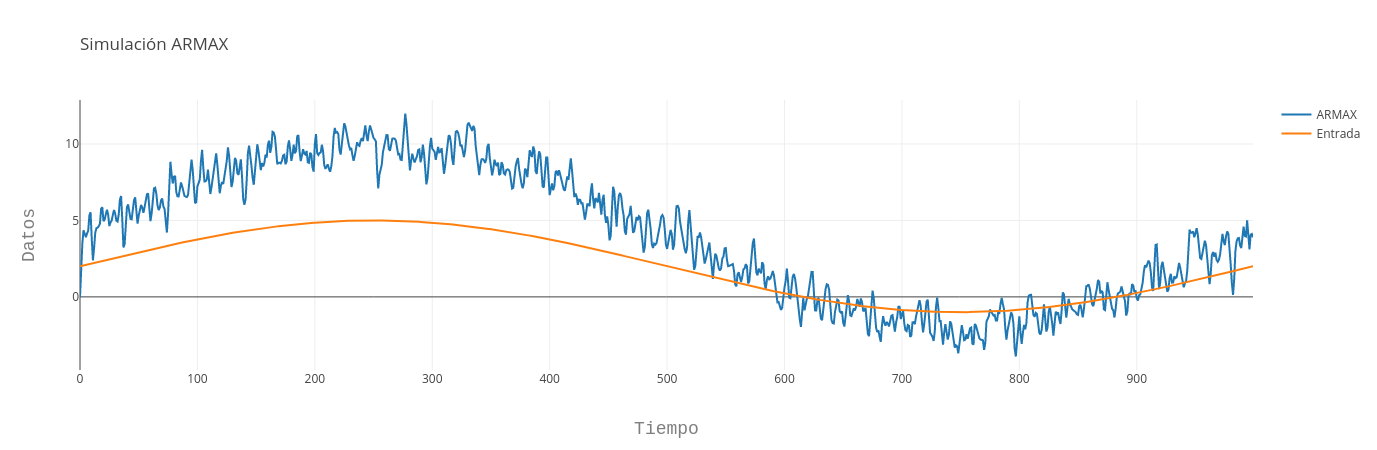

In [28]:
trace1 = go.Scatter(
    y = X.T[0],
    x = np.arange(nobs),
    name = 'ARMAX'
)


trace3 = go.Scatter(
    y = u1,
    x = np.arange(nobs),
    name = 'Entrada'
)

layout = go.Layout(
    title=go.layout.Title(
        text='Simulación ARMAX',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Datos',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

data = [trace1, trace3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='RLS')


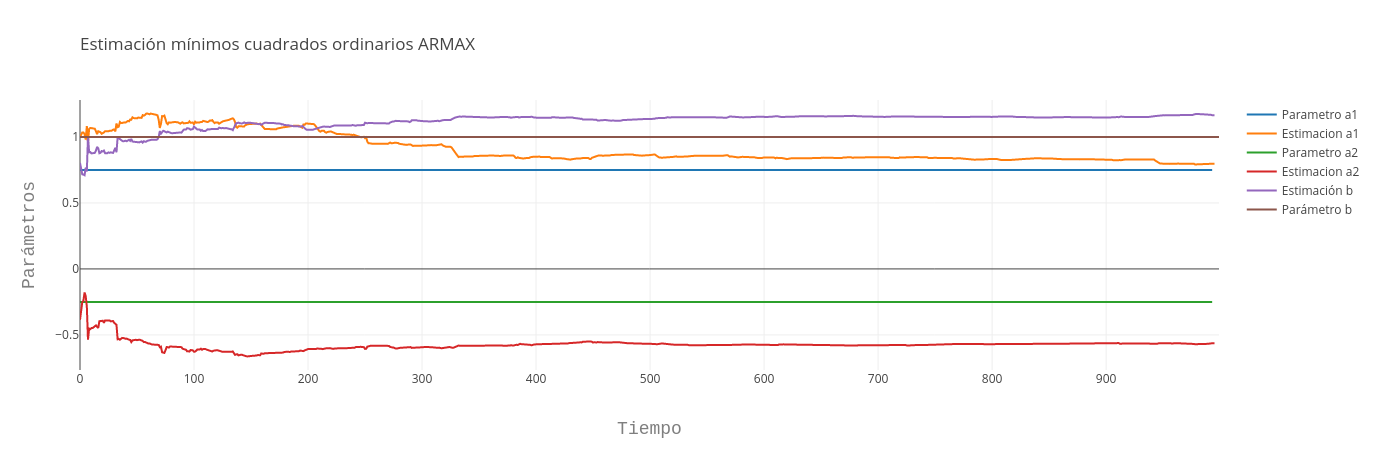

In [24]:
trace = go.Scatter(
    y = a1,
    x = np.arange(nobs),
    name = 'Parametro a1')

trace1 = go.Scatter(
    y = c3,
    x = np.arange(nobs),
    name = 'Estimacion a1')

trace2 = go.Scatter(
    y = a2,
    x = np.arange(nobs),
    name = 'Parametro a2')

trace3 = go.Scatter(
    y = c2,
    x = np.arange(nobs),
    name = 'Estimacion a2')

trace4 = go.Scatter(
    y = c1,
    x = np.arange(nobs),
    name = 'Estimación b')

trace5 = go.Scatter(
    y = [1 for _ in range(nobs)],
    x = np.arange(nobs),
    name = 'Parámetro b')


layout = go.Layout(
    title=go.layout.Title(
        text='Estimación mínimos cuadrados ordinarios ARMAX',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Parámetros',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
traces = [trace, trace1, trace2, trace3, trace4, trace5]

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig,filename='ARMAXx')


### ARMAX Con variables instrumentales

In [25]:
def olsXIV(Bt, X, t):
    V = Bt[0].T*X[2]
    G = Bt[1].T*Bt[0]
    for i in range(1,t):
        V += Bt[i].T*X[i+2]
        G += Bt[i+1].T*Bt[i]        
    return V.T*np.linalg.inv(G)  

In [26]:
c1 = []
c2 = []
c3 = []
for t in range(50, nobs-1):
    c = olsXIV(Bt, X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])
    c3.append(c.A1[2])

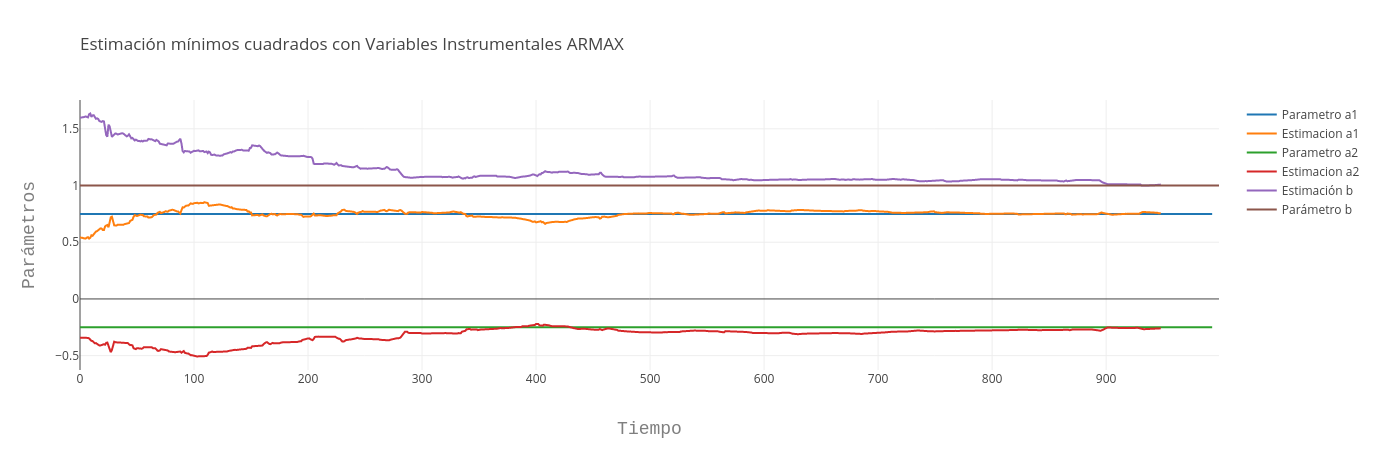

In [27]:
trace = go.Scatter(
    y = a1,
    x = np.arange(nobs),
    name = 'Parametro a1')

trace1 = go.Scatter(
    y = c1,
    x = np.arange(nobs),
    name = 'Estimacion a1')

trace2 = go.Scatter(
    y = a2,
    x = np.arange(nobs),
    name = 'Parametro a2')

trace3 = go.Scatter(
    y = c2,
    x = np.arange(nobs),
    name = 'Estimacion a2')

trace4 = go.Scatter(
    y = c3,
    x = np.arange(nobs),
    name = 'Estimación b')

trace5 = go.Scatter(
    y = [1 for _ in range(nobs)],
    x = np.arange(nobs),
    name = 'Parámetro b')

layout = go.Layout(
    title=go.layout.Title(
        text='Estimación mínimos cuadrados con Variables Instrumentales ARMAX',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Parámetros',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
traces = [trace, trace1, trace2, trace3, trace4, trace5]

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig,filename='ARMAX2')